In [111]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [112]:
class Linear_regression:
  def train(self,alpha = 0.02,max_iters = 5000):
    self.alpha = alpha
    self.max_iters = max_iters
    self.cost_values = []
    self.iterations = []

  def normalize(self,x):
    (m,n) = np.shape(x)
    for i in range(n):
      x[:,i] = (x[:,i] - np.mean(x[:,i]))/(np.std(x[:,i]) + np.exp(-5))
    x = np.hstack((np.ones((m,1)),x))
    return x

  def fit(self,x,y):
    x = self.normalize(x)
    (m,n) = np.shape(x)
    theta = np.zeros(n)
    self.theta = theta
    

    for i in range(self.max_iters):
      self.theta = self.theta - ((self.alpha)/m)*np.dot(x.T,(np.dot(x,self.theta)-y))

      cost = (1/(2*m))*(np.sum(np.power(np.dot(x,self.theta)-y,2)))

      self.cost_values.append(cost)
      self.iterations.append(i)

      if i==0 :
        print("Initial cost is ",cost)
      if i == self.max_iters-1:
        print("Final cost is ",cost)  

    return self  
  
  def prediction(self,x):
    x = self.normalize(x)
    y_pred = np.dot(x,self.theta)
    return y_pred
  
  def accuracy(self,y_pred,y):
    self.y = y
    m = len(self.y)
    self.y_pred = y_pred
    self.y_pred = np.round(self.y_pred)
    for i in range(m):
      sum = 0
      if self.y_pred[i] ==self.y[i]:
        sum+=1
    return  (sum/m)*100
 
  def plot(self):
    plt.plot(self.iterations,self.cost_values)
    plt.xlabel("Iterations")
    plt.ylabel("Cost Values")
    plt.title("Applying Gradient Descent: Cost Function vs Iterations")


In [113]:
train_data = pd.read_csv('sample_data/mnist_train_small.csv')
x_train = np.array(train_data.iloc[:,1:785])
y_train = np.array(train_data.iloc[:,0])

In [114]:
a = Linear_regression()

In [115]:
a.train()
a.fit(x_train,y_train)

Initial cost is  7.172644953324539
Final cost is  1.590578529794343


In [116]:
y_pred = a.prediction(x_train)
print("Accuracy is",a.accuracy(y_pred,y_train))


Accuracy is 0.0


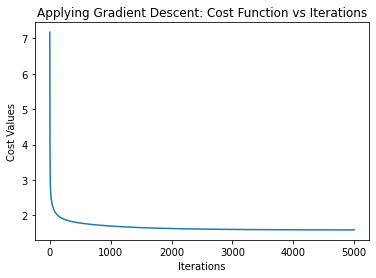

In [117]:
a.plot()

In [118]:
test_data = pd.read_csv('sample_data/mnist_test.csv')
x_test = np.array(test_data.iloc[:,1:785])
y_test = np.array(test_data.iloc[:,0])

In [121]:
y_pred = a.prediction(x_test) # this the output of target from the theta obtained during training